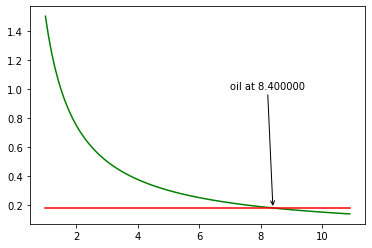

In [1]:
'''

这篇文档仅用于碧蓝航线计算舰娘经验值使用

使用方法：
修改下面的值，运行整个文件

------------------------------------------------

例子：

1.
练2艘航母，航母平均最大油耗13油
用一个经验船，经验船加成15%，经验船油耗3油
每次都是后排旗舰位的mvp

ship_oil = 13.0
ship_number = 3
ship_xp_number = 1
ship_xp_oil = 3.0
ship_xp_rate = 0.15
ship_leader = 1
mvp = 1.0

2.
练1艘轻巡，轻巡平均最大油耗11油
用一个经验船，经验船加成16%，经验船油耗2油
轻巡拿到mvp的概率为50%

ship_oil = 11.0
ship_number = 2
ship_xp_number = 1
ship_xp_oil = 2.0
ship_xp_rate = 0.16
ship_leader = 0
mvp = 0.5

------------------------------------------------

在文章末尾的显示图

横轴代表吃经验船的平均油耗，纵轴代表经验效率

绿色线代表不使用经验船，随着平均油耗增高，经验效率的变化情况
红色线代表使用经验船，随着平均油耗增高，经验效率的变化情况

例如这里的图，表示
在特定情况下，每船平均8.4油前，不使用经验船经验效率较高
平均每船高于8.4油时，使用经验船效率较高

'''

# 实际数据请在这里改动

# 吃经验的船，平均单船最大油耗
ship_oil = 13.0
# 总船数量，包括练船和经验船
ship_number = 3
# 经验船数量
ship_xp_number = 1
# 经验船油耗
ship_xp_oil = 3.0
# 经验船总加成
ship_xp_rate = 0.15

# 是否有旗舰经验加成
ship_leader = 1
# mvp获取概率
mvp = 1.0

from IPython.display import Image

Image("oil.png")

In [2]:
def original_ratio(s_member, s_oil, s_leader_xp):
    '''
    不使用经验船，预期获得的经验比
    
    :param s_member: 吃经验的船总量
    :param s_oil: 平均单船油耗
    :param s_leader_xp: 平均单船油耗
    :return float:经验/油耗 比
    '''

    # 总油耗
    all_oil = s_member * s_oil
    # 总经验
    all_xp = s_member - 1.0 + s_leader_xp
    # 经验/油耗 比
    xp_rate = all_xp / all_oil
    
    return xp_rate

In [3]:
def enhanced_ratio(s_member, s_oil, s_leader_xp, s_xp_number, s_xp_oil, s_xp_rate):
    '''
    使用经验船，预期获得的经验比 
    
    :param s_member: 吃经验的船总量
    :param s_oil: 平均单船油耗
    :param s_leader_xp: 平均单船油耗
    :param s_xp_number: 经验船总数
    :param s_xp_oil:经验船油耗
    :param s_xp_rate:经验船效率加成
    :return float:经验/油耗 比
    '''

    # 吃经验的船数
    ship_member = s_member - s_xp_number

    # 总油耗
    all_oil = ship_member * ship_oil + s_xp_oil * s_xp_number
    # 总经验
    all_xp = (ship_member - 1.0 + s_leader_xp) * (1 + s_xp_rate * s_xp_number)
    # 经验/油耗 比
    xp_rate = all_xp / all_oil
    
    return xp_rate

In [4]:
# 发生mvp，旗舰变化的船经验
leader_ship_xp = 1.0
# 现在使总经验和环境变量挂钩
if ship_leader == 1:
    leader_ship_xp = leader_ship_xp * 1.5
if mvp != 0:
    leader_ship_xp = leader_ship_xp * 2 * mvp

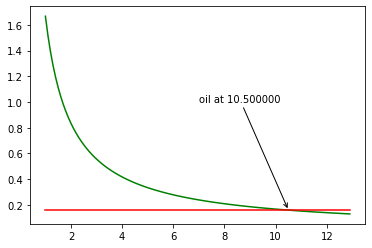

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 不使用经验船
np_ship_oil = np.arange(1, ship_oil, 0.1)
np_ship_rate1 = np.arange(0.0, 0.0, 0.1)
for n, oil in enumerate(np_ship_oil):
    oil_rate = original_ratio(ship_number, oil, leader_ship_xp)
    oil_rate2 = enhanced_ratio(ship_number, oil, leader_ship_xp,
                              ship_xp_number, ship_xp_oil, ship_xp_rate)
    np_ship_rate1 = np.append(np_ship_rate1, oil_rate)

plt.plot(np_ship_oil, np_ship_rate1, color='green')

# 使用经验船
np_ship_rate2 = np.arange(0.0, 0.0, 0.1)
for n, oil in enumerate(np_ship_oil):
    oil_rate = enhanced_ratio(ship_number, oil, leader_ship_xp,
                              ship_xp_number, ship_xp_oil, ship_xp_rate)
    np_ship_rate2 = np.append(np_ship_rate2, oil_rate)

plt.plot(np_ship_oil, np_ship_rate2, color='red')

# 交点
idx = np.argwhere(np.diff(np.sign(np_ship_rate1 - np_ship_rate2))).flatten()
plt.plot(np_ship_oil[idx], np_ship_rate1[idx])
plt.annotate('oil at %f' % np_ship_oil[idx], xy = (np_ship_oil[idx], np_ship_rate1[idx]), 
                    xycoords='data',
                    xytext=(+7, +1),
                    arrowprops=dict(arrowstyle='->'))

plt.show()